In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import random 

In [2]:
class data_structure:
    import random
   
    class test:
        images = []
        labels = []
    class train:
        images = []
        labels = []
        def next_batch(self,batch_num):
            n_train= len(self.images)
            assert n_train>=batch_num
            ind=random.randrange(0,n_train - batch_num)
            #print ind
            #print len(self.labels)
            batch_xs_ = self.images[ind:ind+batch_num,:]
            batch_ys_ = self.labels[ind:ind+batch_num]
            return  batch_xs_, batch_ys_
    def __init__(self):
        self.test=self.test()
        self.train=self.train()
            

In [3]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [4]:
# Convolutional Layer 1.
filter_size1 = 3          # Convolution filters are 5 x 5 pixels.
num_filters1 = 10         # There are 10 of these filters.

# Convolutional Layer 2.
filter_size2 = 3          # Convolution filters are 5 x 5 pixels.
num_filters2 = 20         # There are 20 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

In [5]:

# LOAD DATA
cwd = os.getcwd()
print cwd
#loadpath = "/home/ncc/ml_Tensorflow/notebooks/data.npz"
loadpath = "/home/wjcheon/MachineLearning/TensorFlow-wjcheon/notebooks/data_retina_30.npz"
np_data = np.load(loadpath)
print (np_data.files)


/home/wjcheon/MachineLearning/TensorFlow-wjcheon/notebooks
['testimg', 'trainimg', 'trainlabel', 'imgsize', 'testlabel']


In [6]:
data=data_structure()

In [7]:
# PARSE LOADED DATA
data.train.images = np_data['trainimg']
data.train.labels = np_data['trainlabel']
data.test.images  = np_data['testimg']
data.test.labels  = np_data['testlabel']
imgsize    = np_data['imgsize']


print 'data.train.images row : {0} , col {1}'.format(np.shape(data.train.images)[0],np.shape(data.train.images)[1])
print 'data.train.labels row : {0}'.format(np.shape(data.train.labels[0]))
print 'data.test.image row : {0} , col {1}'.format(np.shape(data.test.images)[0] , np.shape(data.test.images)[1])
print 'data.test.labels row : {0}'.format(np.shape(data.test.labels)[0])
print 'imgsize size is : {0}'.format(np.shape(imgsize)[0])



data.train.images row : 3119 , col 900
data.train.labels row : (4,)
data.test.image row : 780 , col 900
data.test.labels row : 780
imgsize size is : 3


In [8]:
ntrain = data.train.images.shape[0]
nclass = data.train.labels.shape[1]
dim    = data.train.images.shape[1]
ntest  = data.test.images.shape[0]

print ("%d TRAIN IMAGES" % (ntrain))
print ("%d TEST IMAGES" % (ntest))
print ("%d DIMENSIONAL INPUT" % (dim))
print ("%d CLASSES" % (nclass))

tf.set_random_seed(0)

#print(data.train.labels)
x, y_ = data.train.next_batch(3)
print x 
print y_
#print(data.train.images)


3119 TRAIN IMAGES
780 TEST IMAGES
900 DIMENSIONAL INPUT
4 CLASSES
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


In [10]:
def print_np(x):
    print("This is {}".format(type(x)))
    print("Shape is {}".format(x.shape,))
    print("Values are: \n{}".format(x))

In [11]:
print_np(data.train.labels)

This is <type 'numpy.ndarray'>
Shape is (3119, 4)
Values are: 
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]


In [12]:
print_np(data.train.images)

This is <type 'numpy.ndarray'>
Shape is (3119, 900)
Values are: 
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.00161961 ...,  0.00279216  0.00279216
   0.00279216]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [13]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [14]:
print_np(data.test.cls)

This is <type 'numpy.ndarray'>
Shape is (780,)
Values are: 
[0 0 3 2 0 0 1 0 3 1 2 0 2 0 3 1 2 2 3 0 0 3 1 1 2 2 2 0 2 0 1 1 0 3 3 0 0
 3 2 2 1 0 1 1 2 3 0 3 0 2 0 3 3 1 0 1 3 0 2 3 0 0 1 3 2 1 1 2 3 1 2 3 3 0
 2 3 0 3 0 1 0 2 1 0 0 3 0 3 3 2 0 2 1 1 2 2 0 2 3 3 0 2 0 0 3 2 0 3 2 2 1
 1 0 3 2 0 2 0 1 3 3 3 2 3 3 0 2 2 0 0 1 2 3 1 3 3 1 2 3 0 1 0 3 2 0 3 3 3
 0 3 2 1 1 3 3 3 2 0 0 1 3 0 0 3 3 1 3 1 1 3 1 2 2 2 0 0 2 1 0 1 2 0 3 2 3
 3 3 0 0 0 3 0 1 1 3 2 3 0 3 0 0 0 1 3 2 1 0 3 0 1 1 1 2 0 0 1 0 2 2 0 2 1
 2 3 3 0 1 0 3 0 0 1 1 1 0 2 0 1 3 1 1 0 0 2 1 2 3 3 3 3 3 0 0 2 3 2 2 3 0
 0 0 0 3 1 3 0 3 2 2 1 3 2 3 0 2 3 2 1 3 3 1 3 3 3 0 3 1 1 1 3 1 1 2 3 2 1
 1 1 0 3 2 1 0 0 3 3 0 0 1 2 3 1 2 1 2 3 0 0 2 1 1 0 3 0 0 2 1 3 1 2 3 0 3
 0 2 3 1 3 3 1 3 3 2 2 1 0 1 2 1 3 2 0 0 2 1 2 3 3 0 0 1 1 2 3 0 0 2 0 1 3
 2 3 1 2 3 2 3 3 3 3 3 2 0 1 2 2 0 1 1 3 2 1 0 1 3 2 0 0 0 0 2 3 2 3 3 0 3
 3 2 0 1 2 1 1 0 2 3 1 0 2 1 0 3 2 2 0 1 1 3 3 0 1 2 2 1 2 3 1 2 0 0 2 0 1
 1 1 1 1 3 3 0 3 0 0 3 3 2 2 1 0 2 2 2 1

In [15]:
# We know that MNIST images are 28 pixels in each dimension.
#img_size = 28
img_size = int(math.sqrt(data.train.images.shape[1]))
print(img_size)

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 4

30


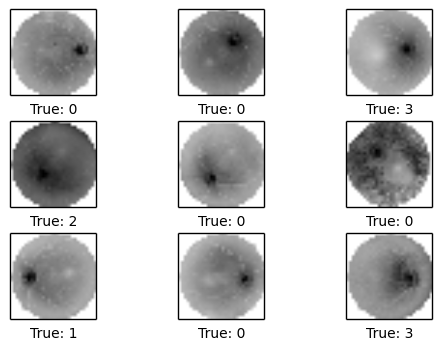

In [17]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [18]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [19]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [20]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [49]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [50]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [52]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x

In [53]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
x_image

In [54]:
y_true = tf.placeholder(tf.float32, shape=[None, nclass], name='y_true')
y_true

In [55]:
y_true_cls = tf.argmax(y_true, dimension=1)
y_true_cls

In [56]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

In [57]:
layer_conv1
#weights_conv1

In [58]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [59]:
layer_conv2

In [60]:
layer_flat, num_features = flatten_layer(layer_conv2)

In [61]:
layer_flat

In [62]:
num_features

1280

In [63]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

In [64]:
layer_fc1

In [65]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [66]:
layer_fc2

In [67]:
y_pred = tf.nn.softmax(layer_fc2)

In [68]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [69]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

In [70]:
cost = tf.reduce_mean(cross_entropy)

In [71]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [72]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [73]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [74]:
session = tf.Session()

In [75]:
session.run(tf.initialize_all_variables())

In [76]:
train_batch_size = 32

In [77]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [78]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [79]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [80]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [81]:
print_test_accuracy()

Accuracy on Test-Set: 24.1% (188 / 780)


In [82]:
optimize(num_iterations=1)

2097
3119
Optimization Iteration:      1, Training Accuracy:  37.5%
Time usage: 0:00:00


In [83]:
print_test_accuracy()

Accuracy on Test-Set: 24.1% (188 / 780)


In [84]:
optimize(num_iterations=99) # We already performed 1 iteration above.

970
3119
1680
3119
2939
3119
1774
3119
83
3119
2634
3119
659
3119
612
3119
1127
3119
2682
3119
2515
3119
413
3119
1185
3119
2860
3119
2600
3119
1529
3119
1564
3119
501
3119
1559
3119
1796
3119
2181
3119
1194
3119
320
3119
2752
3119
3028
3119
1571
3119
2707
3119
2810
3119
1022
3119
73
3119
434
3119
2187
3119
497
3119
2985
3119
1095
3119
141
3119
2558
3119
1392
3119
321
3119
866
3119
1582
3119
271
3119
1856
3119
298
3119
1024
3119
1615
3119
2125
3119
813
3119
2960
3119
2753
3119
1565
3119
2609
3119
1274
3119
1936
3119
3056
3119
1474
3119
425
3119
126
3119
2839
3119
557
3119
1365
3119
785
3119
1636
3119
2546
3119
2447
3119
1697
3119
1364
3119
2731
3119
77
3119
618
3119
2136
3119
2484
3119
3028
3119
83
3119
1119
3119
2090
3119
754
3119
1701
3119
2768
3119
1627
3119
1788
3119
1888
3119
151
3119
2569
3119
2798
3119
2821
3119
2915
3119
1242
3119
455
3119
2650
3119
1423
3119
818
3119
1729
3119
377
3119
2924
3119
0
3119
2610
3119
2827
3119
1485
3119
Time usage: 0:00:03


Accuracy on Test-Set: 24.1% (188 / 780)
Example errors:


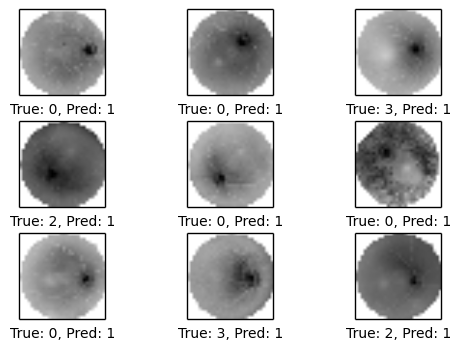

Confusion Matrix:
[[  0 202   0   0]
 [  0 188   0   0]
 [  0 162   0   0]
 [  0 228   0   0]]


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


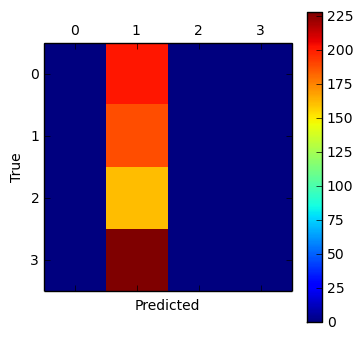

In [85]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

In [86]:
optimize(num_iterations=990) # We already performed 1 iteration above.

2701
3119
Optimization Iteration:    101, Training Accuracy:  18.8%
1846
3119
560
3119
1351
3119
134
3119
2029
3119
1807
3119
1147
3119
800
3119
652
3119
1575
3119
20
3119
1035
3119
2017
3119
2135
3119
2423
3119
2312
3119
1119
3119
2296
3119
2837
3119
2237
3119
2714
3119
1655
3119
2132
3119
635
3119
2369
3119
1427
3119
2234
3119
1380
3119
776
3119
1755
3119
597
3119
1741
3119
2105
3119
1151
3119
2691
3119
1343
3119
2549
3119
1013
3119
35
3119
1938
3119
1698
3119
994
3119
2591
3119
816
3119
1279
3119
1938
3119
1375
3119
1303
3119
2960
3119
445
3119
27
3119
2268
3119
1547
3119
265
3119
1148
3119
209
3119
1983
3119
50
3119
202
3119
1083
3119
3024
3119
2716
3119
1934
3119
1207
3119
1870
3119
1168
3119
1845
3119
2228
3119
340
3119
2403
3119
2750
3119
2314
3119
464
3119
120
3119
1510
3119
1337
3119
236
3119
840
3119
2301
3119
2977
3119
849
3119
1474
3119
2574
3119
218
3119
2387
3119
2713
3119
2178
3119
903
3119
3047
3119
1857
3119
2023
3119
1208
3119
307
3119
133
3119
2282
3119
1752
3119
171

Accuracy on Test-Set: 38.3% (299 / 780)
Example errors:


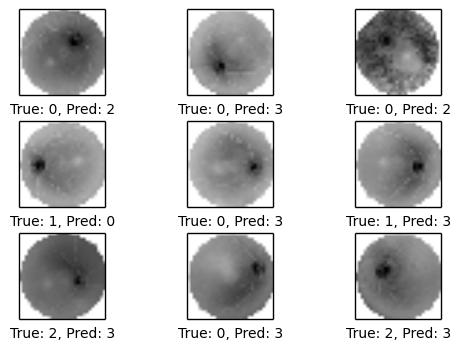

Confusion Matrix:
[[ 19   7  41 135]
 [ 16   8  36 128]
 [ 10   5 104  43]
 [  6   1  53 168]]


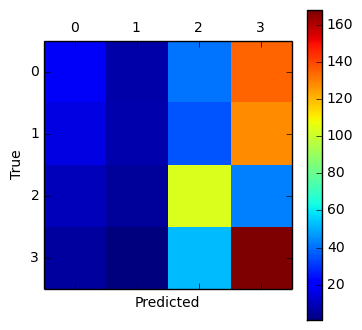

In [87]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

In [88]:
optimize(num_iterations=1000) # We already performed 1 iteration above.

1687
3119
918
3119
1322
3119
1895
3119
2439
3119
728
3119
849
3119
2521
3119
137
3119
461
3119
1353
3119
Optimization Iteration:   1101, Training Accuracy:  56.2%
1480
3119
1789
3119
372
3119
1782
3119
1513
3119
490
3119
955
3119
2761
3119
2380
3119
145
3119
887
3119
2107
3119
575
3119
2414
3119
2598
3119
43
3119
2821
3119
1670
3119
1493
3119
2618
3119
1443
3119
178
3119
1500
3119
671
3119
2187
3119
3009
3119
2637
3119
2903
3119
333
3119
2336
3119
1201
3119
127
3119
146
3119
2692
3119
987
3119
2979
3119
1820
3119
862
3119
577
3119
2354
3119
2931
3119
2692
3119
1064
3119
2029
3119
1189
3119
2153
3119
420
3119
1451
3119
2708
3119
2886
3119
1443
3119
1408
3119
1090
3119
1926
3119
1064
3119
2784
3119
1220
3119
1918
3119
2476
3119
2405
3119
315
3119
296
3119
2597
3119
2384
3119
849
3119
2396
3119
612
3119
2053
3119
2654
3119
1866
3119
2160
3119
2446
3119
122
3119
1706
3119
1411
3119
98
3119
2859
3119
2509
3119
1784
3119
3005
3119
320
3119
1921
3119
2941
3119
1389
3119
939
3119
318
3119
2079

Accuracy on Test-Set: 40.5% (316 / 780)
Example errors:


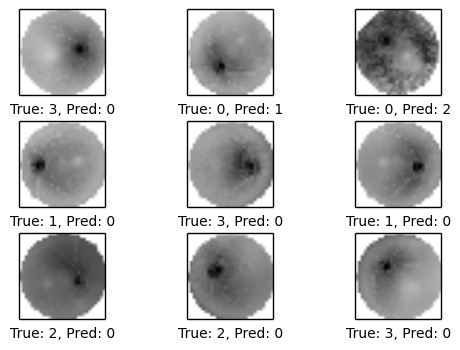

Confusion Matrix:
[[128  19  19  36]
 [ 96  54  19  19]
 [ 56   6  85  15]
 [137  17  25  49]]


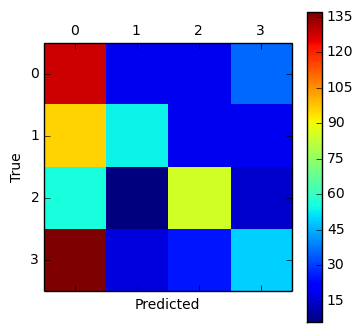

In [89]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

In [52]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [53]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [54]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

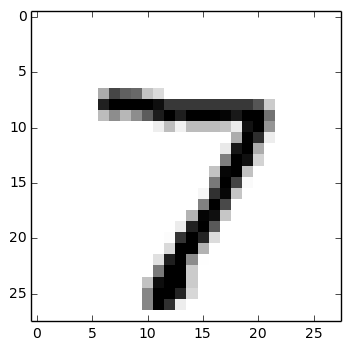

In [55]:
image1 = data.test.images[0]
plot_image(image1)

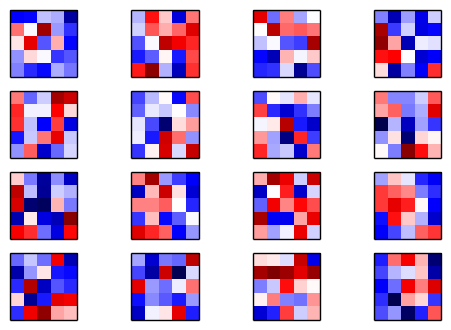

In [56]:
plot_conv_weights(weights=weights_conv1)

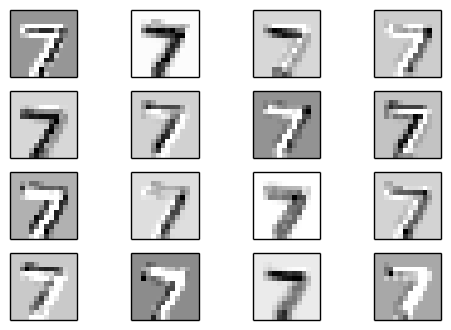

In [57]:
plot_conv_layer(layer=layer_conv1, image=image1)

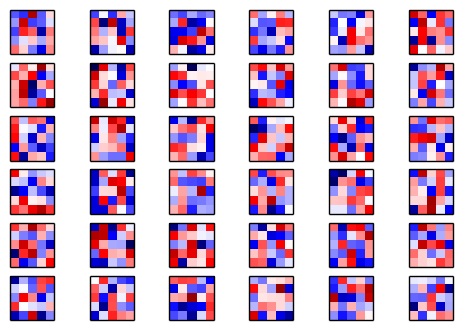

In [58]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

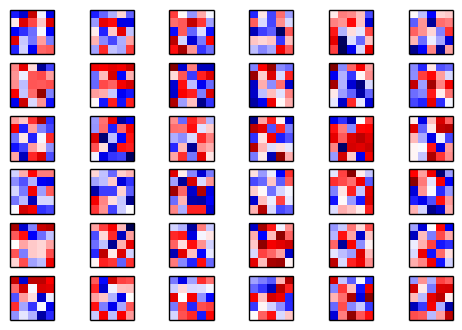

In [59]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

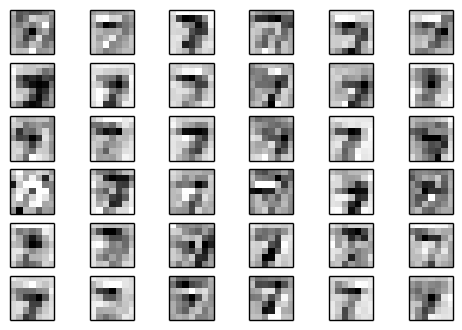

In [60]:
plot_conv_layer(layer=layer_conv2, image=image1)

In [61]:
plot_conv_layer(layer=layer_conv2, image=image2)

NameError: name 'image2' is not defined

In [ ]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
# session.close()